# Final project, Numerical Analysis 2022-2023

**Student:**  Isac Pasianotto

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import BallTree
import time


## Project description

In this project, we would like to compare the performance of some embarassingly simple algorithms to solve a classification problem based on the MNIST database. 

The abstract aim of the program is to write a function:

```
result = classify(image)
```

that takes as input a small grey scale image of a hand-written digit (from the MNIST database), and returns the digit corresponding to the content of the image.

An example of the images we'll be working on is the following:

![m\nist examples](https://m-alcu.github.io/assets/mnist.png)

Some background on the MNIST database (from wikipedia):


## MNIST database

*From Wikipedia, the free encyclopedia*

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

## MNIST sample images.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23%. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support vector machine to get an error rate of 0.8%. An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters.

## Algorithm

We start by defining the distance between two images. Ideally, a distance function between two images is zero when the images are the same, and greater than zero when the images are different. 

The bigger the distance, the more different the images should be. Ideally, the distance between an image of the number `9` should be closer to an image of the number `8` than to an image of the number `1` (the digits `9` and `8`, as images, differ by the fact that the first has one closed loop, while the second has two closed loops, while the digit `1` is mostly a straight line). Two different images representing the same number should be even closer (i.e., the distance function should return a "small" number).

Given a distance and a training set of images for which we know everything, the simplest algorithm we can think of to classify an image `z`, is the following: given a set of train images (`x_train`) for which we know the digit they represent (`y_train`), measure the distance between `z` and all images in `x_train`, and classify the image `z` to represent the same digit of the image that is closest to `z` in `x_train`:

Parameters of the algorithm:

- `x_train`
- `y_train`
- a distance function `dist`  

Input of the function

- `z`

Output of the function

- `digit`

where 

```
def classify(z):
    all_distances = array([dist(x, z) for x in x_train])
    digit = y_train[argmin(all_distances)]
    return digit
```

We will experiment with different distances, and we will try to improve the algorithm above in a step by step fashon.

## Data description

Each image in the MNIST dataset represents a hand written digit, in the form of a matrix of `28x28` values between zero and one, representing gray scale values (zero = white, one = black).

We use an array of `60.000x28x28` floating point values to collect all training images, and an array of `60.000` digits containing the (correct) value of the training digits (between 0 and 9 inclusive).

The testing images are instead collected into two arrays of size `10.000x28x28` and `10.0000` respectively.

In [2]:
arc = np.load('mnist.npz')

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Plotting one image

How do we plot the images? `pyplot`, which has been imported by the first line of the previous cell, contains a command called `imshow`, that can be used to plot images. 

In this case we know it is a greyscale image, with zero representing white and one representing black, so we use a colormap that goes from white to black, i.e., `gray_r` where `_r` stands for reversed. 

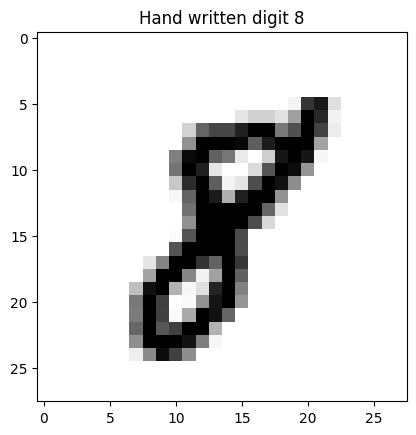

In [3]:
# Show image number 15, and write in the title what digit it should correspond to
N= 17
plt.imshow(x_train[N], cmap='gray_r')
_ = plt.title('Hand written digit '+str(y_train[N]))

**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

General guidelines:

- Time all functions you construct, and try to make them run as fast as possible by precomputing anything that can be precomputed
- Extra points are gained if you reduce the complexity of the given algorithms in any possible way, for example by exploiting linearity, etc.
- If something takes too long to execute, make sure you time it on a smaller set of input data, and give estimates of how long it would take to run the full thing (without actually running it). Plot only the results you manage to run on your PC.

# Assignment 1

Implement the following distance functions

- d_infty $$ d_{\infty}(a,b) := \max_{i,j} |b_{ij}-a_{ij}|$$
- d_one $$ d_1(a,b) := \sum_{i,j} |b_{ij}-a_{ij}|$$
- d_two $$ d_2(a,b) := \sqrt{\sum_{i,j} |b_{ij}-a_{ij}|^2}$$

that take two `(28,28)` images in input, and return a non-negative number.


In [4]:
def d_infty(A, B):
    '''
    Computes the infinity-norm distance between two images A and B, which is 
    d = max_{ij} |a_{ij}-b{ij}|. 
    Args:
        A: np.array of shape (n, n) representing the first image
        B: np.array of shape (n, n) representing the second image
    Returns:
        float: the distance between A and B 
    '''

    # np.arrays must have the same shape
    assert A.shape == B.shape, 'Images A and B must have the same shape'
    return np.max(np.abs(A - B))

def d_one(A, B):
    '''
    Computes the one-norm distance between two images A and B, which is
    d = sum_{ij} |a_{ij}-b{ij}|.
    Args:
        A: np.array of shape (n, n) representing the first image
        B: np.array of shape (n, n) representing the second image
    Returns:
        float: the distance between A and B
    '''

    # np.arrays must have the same shape
    assert A.shape == B.shape, 'Images A and B must have the same shape'
    return np.sum(np.abs(A - B))

def d_two(A, B):
    '''
    Computes the two-norm distance between two images A and B, which is
    d = sqrt(sum_{ij} (a_{ij}-b{ij})^2).
    Args:
        A: np.array of shape (n, n) representing the first image
        B: np.array of shape (n, n) representing the second image
    Returns:
        float: the distance between A and B
    '''

    # np.arrays must have the same shape
    assert A.shape == B.shape, 'Images A and B must have the same shape'
    # Note: since x^2 = |x|^2, the computation of the absolute value can be omitted 
    #       in order to make the computation faster
    return np.sqrt(np.sum((A - B)**2))

In [5]:
# Exercise 1: Timing
A, B = x_train[0], x_train[1]
distances = [d_infty, d_one, d_two]

for distance in distances:
    print(f'\n{distance.__name__}(A, B):')
    %timeit distance(A, B)


d_infty(A, B):
3.37 µs ± 26.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

d_one(A, B):
3.39 µs ± 21.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

d_two(A, B):
4.08 µs ± 58.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


The computation of the distances $d_{\infty}(a,b)$ and $d_1(a,b)$ takes the same amount of time, while the computation of $d_2(a,b)$ takes longer, which is the expected behaviour since it involves a square root.


# Assignment 2

Write a function that, given a number `N`, and a distance function `dist`, computes the distance matrix D of shape `(N,N)` between the first `N` entries of `x_train`:

```
D[i,j] = dist(x_train[i], x_train[j])
```

performing the **minimum** number of operations (i.e., avoid computing a distance if it has already been computed before, i.e., keep in mind that dist(a,b) = dist(b,a)).


In [6]:
def dist_matrix(dist, N = 150, data = x_train):
    '''
    Computes the distance matrix of the first N images in the dataset: 
    D[i, j] = dist(data[i], data[j]) 
    Args:
        dist: function, distance function
        N: int, number of images to consider, default: 150
        data: np.array of shape (k, n, n), which represents k images of shape (n, n). 
                Default: x_train
    Returns:
        np.array of shape (N, N), the distance matrix
    '''

    # N must be  <= data.shape[0] and > 0
    assert N <= data.shape[0] and N > 0, 'N must be  data.shape[0] and > 0'
    # dist must be a function
    assert callable(dist), 'dist must be a function'
    # data must be a np.array, with a valid shape
    assert data.shape[1] == data.shape[2], 'data must be a np.array of shape (k, n, n)'

    dm = np.zeros((N, N))
    for i in range(N):
        for j in range(i):
            dm[i, j] = dm[j, i] = dist(data[i], data[j])
    
    return dm

*Comment*: due to the fact that the distance function $d$ is symmetric, the distance matrix $D$ is symmetric as well. This means that we only need to compute the upper/lower triangular part of the matrix, and then copy the values to the remaining part of the matrix.
Moreover, since $d(a,a)) = 0$ for any $a$, we can avoid computing the diagonal of the matrix to.

Considering a ginven $N$, the number of operations needed to compute the distance matrix is $N(N-1)/2 = \mathcal{O}(N^2)$.

In [7]:
# Exercise 2: Timing
vals = [15, 30, 150]
for N in vals:
    print('\nN =', N)
    %timeit dist_matrix(d_infty, N = N)


N = 15
436 µs ± 2.23 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

N = 30
1.83 ms ± 33.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

N = 150
46.7 ms ± 240 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)



# Assignment 3

Compute and plot the three distance matrices

- Dinfty
- D1
- D2

for the first 100 images of the training set, using the function `imshow` applied to the three matrices



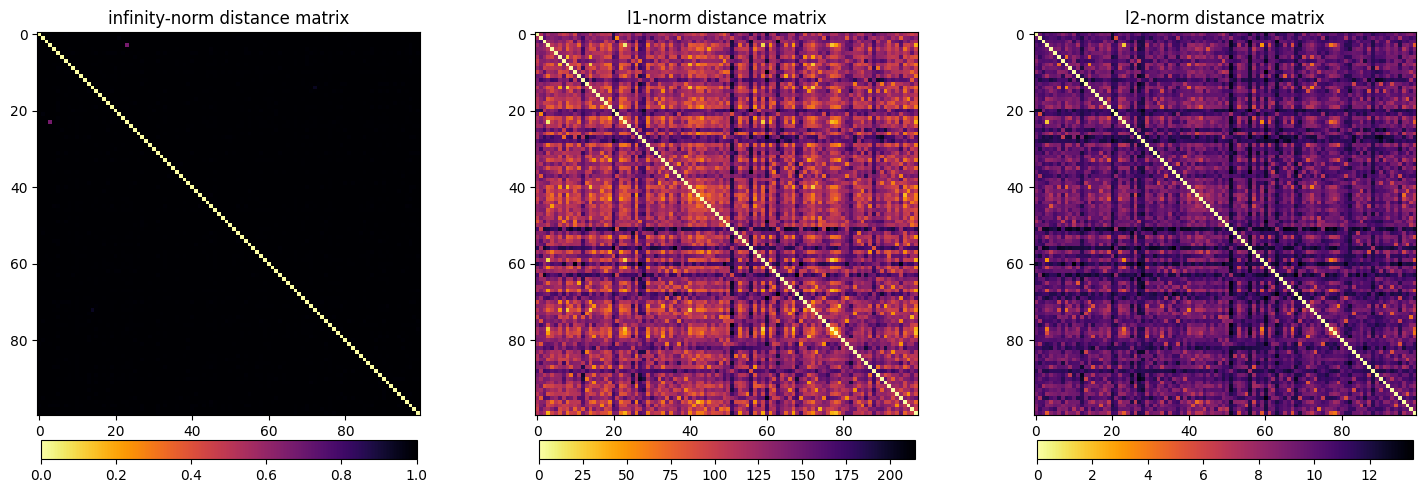

In [8]:
n =100
cmap = 'inferno_r'

dinf = dist_matrix(d_infty, N = n)
done = dist_matrix(d_one, N = n)
dtwo = dist_matrix(d_two, N = n)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

dinf = axes[0].imshow(dinf, cmap=cmap)
_ = axes[0].set_title('infinity-norm distance matrix')
cbinf = plt.colorbar(dinf, ax=axes[0], fraction=0.044, pad=0.06, orientation='horizontal')
done = axes[1].imshow(done, cmap=cmap)
_ = axes[1].set_title('l1-norm distance matrix')
cbone = plt.colorbar(done, ax=axes[1], fraction=0.044, pad=0.06, orientation='horizontal')
dtwo = axes[2].imshow(dtwo, cmap=cmap)
_ = axes[2].set_title('l2-norm distance matrix')
cbtwo = plt.colorbar(dtwo, ax=axes[2], fraction=0.044, pad=0.06, orientation='horizontal')

plt.tight_layout()
plt.show()


# Assignment 4

Using only a distance matrix, apply the algorithm described above and compute the efficency of the algorithm, i.e., write a function that:

Given a distance matrix with shape `(N,N)`, constructed on the first `N` samples of the `x_train` set, count the number of failures of the **leave one out** strategy, i.e., 

- set `error_counter` to zero

- for every line `i` of the matrix:

    - find the index `j` (different from `i`) for which `D[i,k] >= D[i,j]` for all `k` different from `i` and `j`.

    - if `y_train[j]` is different from `y_train[i]`, increment by one `error_counter`

- return the error: error_counter/N

- apply the function above to the 3 different distance matrices you computed before



In [9]:
def loo_err(dist, N = 100, data_x = x_train, data_y=y_train, dmatrix = None):
    '''
    Computes the leave-one-out error of the first N images in the dataset:
    loo_err[i] =  1/N sum_{i} (y_i != y_hat_i), where y_hat_i is the label of the
    image that is closest to the i-th image, according to the distance dist.
    Args:
        dist: function, distance function
        N: int, number of images to consider, default: 100
        data_x: np.array of shape (k, n, n), which represents k images of shape (n, n). 
                Default: x_train
        data_y: np.array of shape (k,), which represents the labels of the images in data_x. 
                Default: y_train
        dmatrix: np.array of shape (N, N), the distance matrix. If None, it is computed
    Returns:
        float: the leave-one-out error
    '''

    # N must be  <= data_x.shape[0] and > 0
    assert N <= data_x.shape[0] and N > 0, 'N must be  data_x.shape[0] and > 0'
    # dist must be a function
    assert callable(dist), 'dist must be a function'
    # data_x must be a np.array, with a valid shape
    assert data_x.shape[1] == data_x.shape[2], 'data_x must be a np.array of shape (k, n, n)'
    # data_y must be a np.array, with a valid shape
    assert data_y.shape[0] == data_x.shape[0], 'data_y must have the same number of elements as data_x'

    error_counter = 0
    if dmatrix is None:
        dmatrix = dist_matrix(dist, N, data_x)
    for i in range (N):
        dmatrix[i, i] = np.inf # set the diagonal to infinity to avoid the trivial solution
        j = np.argmin(dmatrix[i])

        if data_y[i] != data_y[j]:
            error_counter += 1

    return error_counter/N

*Comment*: The time complexity of this algorithm is $\mathcal{O}(N^2)$, since it requires to compute the distance matrix with `dist_matrix` function which, as said before, has a quadratic time complexity.

If we want to consider the case in which the distance matrix is already computed, the complexity still remains $\mathcal{O}(N^2)$, since the algorithm performs $N$ iterations, and each iteration requires to find the minimum of $N-1$ elements, which is $\mathcal{O}(N)$.

In [10]:
# Exercise 4: Timing

# pre-compute the distance matrices 
dinf = dist_matrix(d_infty, N = n)
done = dist_matrix(d_one, N = n)
dtwo = dist_matrix(d_two, N = n)
dist_matrices = [dinf, done, dtwo]

for dist in distances:
    print('---------------------')
    print(f'{dist.__name__} - no matrix:')
    %timeit loo_err(dist, N = n)
    print(f'\n{dist.__name__} - precomputed matrix:')
    %timeit loo_err(dist, N = n, dmatrix = dist_matrices[distances.index(dist)])

---------------------
d_infty - no matrix:
20.9 ms ± 322 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

d_infty - precomputed matrix:
144 µs ± 2.37 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
---------------------
d_one - no matrix:
20.7 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

d_one - precomputed matrix:
144 µs ± 495 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
---------------------
d_two - no matrix:
24.9 ms ± 630 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

d_two - precomputed matrix:
143 µs ± 1.54 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


It's evident that the most impacting part of the algorithm is the computation of the distance matrix.


# Assignment 5

Run the algorithm implemented above for N=100,200,400,800,1600 on the three different distances, and plot the three error rate as a function of N (i.e., compute the distance matrix, and compute the efficiency associated to the distance matrix).

You should get an error like:
```
[[ 0.58      0.17      0.17    ]
 [ 0.52      0.145     0.135   ]
 [ 0.4425    0.15      0.135   ]
 [ 0.4       0.145     0.12875 ]
 [ 0.369375  0.1025    0.09375 ]]
```
where each column represents a different norm.

** In the next assignments, optional points are given if you manage to make the algorithm run faster, by pre-computing everything you can precompute in advance **


In [11]:
N = 5
steps = [100 * 2**i for i in range(N)]  

loo_err_inf = [loo_err(d_infty, N = n) for n in steps]
loo_err_one = [loo_err(d_one, N = n) for n in steps]
loo_err_two = [loo_err(d_two, N = n) for n in steps]

# check that the errors are correct
np.stack((loo_err_inf, loo_err_one, loo_err_two), axis=1)

array([[0.58    , 0.17    , 0.17    ],
       [0.52    , 0.145   , 0.135   ],
       [0.4425  , 0.15    , 0.135   ],
       [0.4     , 0.145   , 0.12875 ],
       [0.369375, 0.1025  , 0.09375 ]])

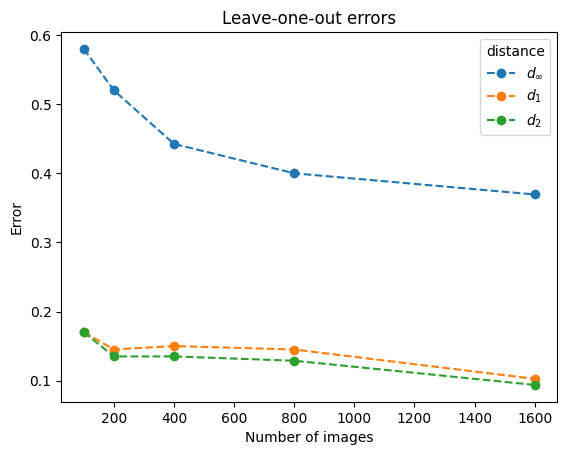

In [12]:
plt.plot(steps, loo_err_inf, 'o--')
plt.plot(steps, loo_err_one, 'o--')
plt.plot(steps, loo_err_two, 'o--')
plt.legend(['$d_\\infty$', '$d_1$', '$d_2$'], loc='best', title='distance')
plt.title('Leave-one-out errors')
plt.xlabel('Number of images')
plt.ylabel('Error')
plt.show()


# Assignment 6

In principle, it should be possible to decrease the error by using a better norm. From the table above, it is clear that the L2 distance works better than the L1 distance, which works better than the Linfty distance.

However, *none of these distances exploit the fact that the image is a two-dimensional object*, and that there is information also in the **neighboring** information of the pixels. 

One way to exploit this, is to interpret the image as a continuous function with values between zero and one, defined on a square domain `\Omega=[0,27]x[0,27]`.

$$ f: \Omega \to R $$

- Implement a function that computes an approximation of the $H^1$ norm distance on the renormalized images. Given two images $f_1$ and $f_2$
    - Compute
        $$a = \frac{f_1}{\int_\Omega f_1}$$
        $$b = \frac{f_2}{\int_\Omega f_2}$$
  
    - Define the $H^1$ distance as
    $$
    d_{H^1}(f_1,f_2) := \sqrt{\int_\Omega |\nabla(a-b)|^2+ (a-b)^2}
    $$
    using the algorithm you prefer (or the library you prefer) to compute the gradients and the integrals. Notice that $\nabla f = (\partial f/\partial x, \partial f/\partial y)$ is a vector valued function, and $|\nabla g|^2 := (\partial g/\partial x)^2 + (\partial g/\partial y)^2$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600


*Solution*:

Since, even if we treat the images as continuous functions, we are still working with discrete data, we can approximate the integral with a sum. For what concerns the gradient, we can use the [`numpy.gradient`](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) function. 

Since the computation of $a$ and $b$ is the same for every couple of images and it can be quite time consuming, we can compute it once for all, store the result and pass it to the function that computes the distance matrix as an additional parameter.

In [13]:
def d_H1(f1, f2):
    '''
    Compute the H1 distance between two functions f1 and f2, interpreted as
    continuous functions. 
    H1(f1, f2) = sqrt(int_{Omega}( |grad(a-b)|^2 + (a-b)^2) )
    with a = f1/int_{Omega} f1 and b = f2/int_{Omega} f2
    Args:
        f1: np.array of shape (n, n) representing the first image
        f2: np.array of shape (n, n) representing the second image
    Returns:
        float: the H1 distance between f1 and f2
    '''

    # np.arrays must have the same shape
    assert f1.shape == f2.shape, 'Images f1 and f2 must have the same shape'
    assert f1.shape[0] == f1.shape[1] and f2.shape[0] == f2.shape[1], 'Images f1 and f2 must be square'
    
    a = f1 / np.sum(f1)
    b = f2 / np.sum(f2)
    arg = np.square(np.gradient(a-b)) + np.square(a-b)
    return np.sqrt(np.sum(arg))


# Faster solution: 

def normalize(f):
    '''
    Normalize an 2d-vector f representing an image, such that the integral is 1
    a = f / int_{Omega} f
    Args:
        f: np.array of shape (n, n) representing the image
    Returns:
        np.array of shape (n*n,) which is the normalized image
    '''

    # np.arrays must be square
    assert f.shape[0] == f.shape[1], 'Image f must be square'

    return f/np.sum(f)

def d_H1_fast(a, b):
    '''
    Compute the H1 distance between two images f1 and f2, which are already
    been normalized into a and b 2d-vectors respectively.
    args:
        a: np.array of shape (n*n,) representing the first image
        b: np.array of shape (n*n,) representing the second image
    Returns:
        float: the H1 distance between f1 and f2
    '''

    # np.arrays must have the same shape
    assert a.shape == b.shape, 'Images a and b must have the same shape' 


    arg = np.square(np.gradient(a-b)) + np.square(a-b)
    return np.sqrt(np.sum(arg))

In [14]:
# Exercise 5, part 1: Timing
A, B = x_train[0], x_train[1]
a, b = normalize(A), normalize(B)

print('d_H1 withouth pre-coputation:')
%timeit d_H1(A, B)
print('\nTime to normalize 2 images:')
%timeit normalize(A); normalize(B)
print('\nd_H1 with pre-coputation:')
%timeit d_H1_fast(a, b)

d_H1 withouth pre-coputation:
39.2 µs ± 298 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

Time to normalize 2 images:
6.58 µs ± 23.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

d_H1 with pre-coputation:
31.8 µs ± 266 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Computation of the distance matrix and efficiency fon $N$ = 100, 200, 400, 800, 1600:

In [15]:
# # Run it once to pre-compute the normalized images of the dataset: 
# x_train_norm = np.array([normalize(x) for x in x_train], copy=True)
# x_test_norm = np.array([normalize(x) for x in x_test], copy=True)
# np.savez_compressed('mnist_norm.npz', x_train_norm, y_train, x_test_norm, y_test)

loaded = np.load('mnist_norm.npz')
x_train_norm = loaded['arr_0']
x_test_norm = loaded['arr_2']

# Compute the distance matrices, I've used the same N as above to make the comparison easier
for N in vals:
    print('-------------------')
    print(f'H1-with no pre-computation, N = {N} :')
    %timeit dist_matrix(d_H1, N = N, data = x_train[:N])
    print(f'\nH1-with pre-computation, N = {N} :')
    %timeit dist_matrix(d_H1_fast, N = N, data = x_train_norm[:N])

-------------------
H1-with no pre-computation, N = 15 :
4.19 ms ± 42.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

H1-with pre-computation, N = 15 :
3.45 ms ± 21.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
-------------------
H1-with no pre-computation, N = 30 :
17.4 ms ± 38.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

H1-with pre-computation, N = 30 :
14.3 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
-------------------
H1-with no pre-computation, N = 150 :
439 ms ± 2.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

H1-with pre-computation, N = 150 :
361 ms ± 3.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


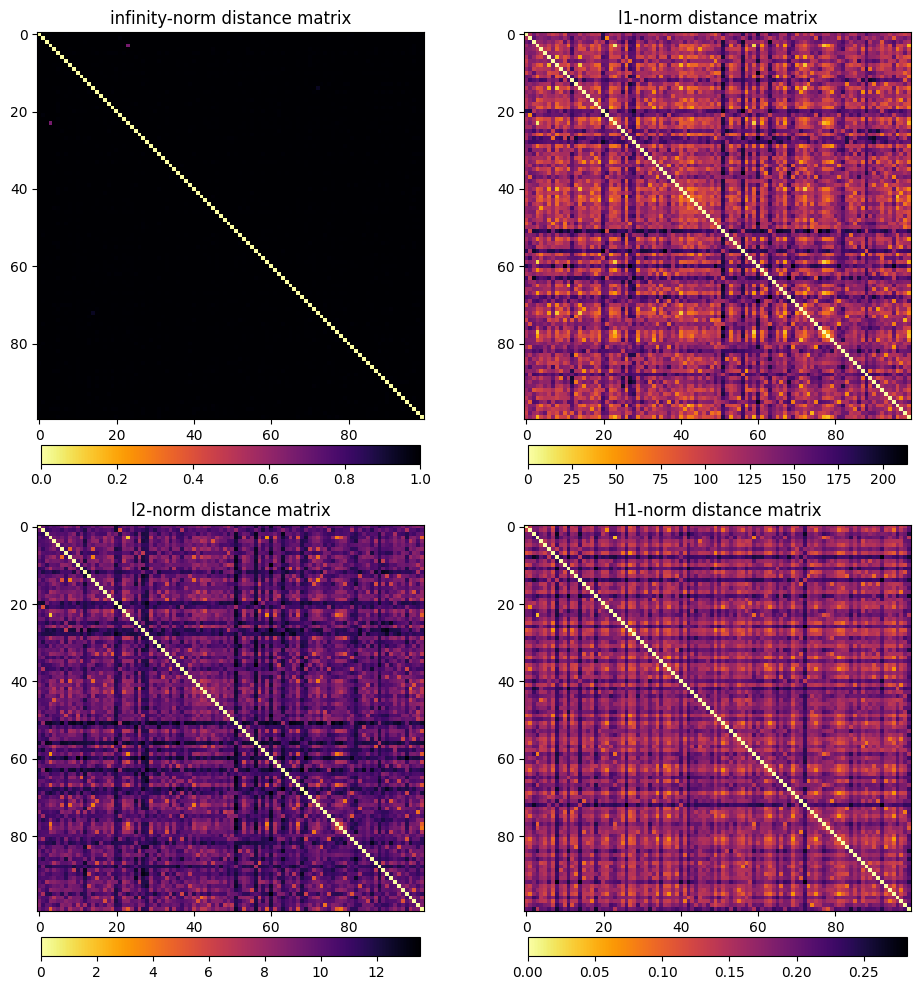

In [16]:
# compute the distance matrices: 
dinf = dist_matrix(d_infty, N = n)
done = dist_matrix(d_one, N = n)
dtwo = dist_matrix(d_two, N = n)
dH1 = dist_matrix(d_H1_fast, N=n, data=x_train_norm[:n])

fig, axes = plt.subplots(2,2, figsize=(10, 10))

dinf = axes[0,0].imshow(dinf, cmap=cmap)
_ = axes[0,0].set_title('infinity-norm distance matrix')
cbinf = plt.colorbar(dinf, ax=axes[0,0], fraction=0.044, pad=0.06, orientation='horizontal')
done = axes[0,1].imshow(done, cmap=cmap)
_ = axes[0,1].set_title('l1-norm distance matrix')
cbone = plt.colorbar(done, ax=axes[0,1], fraction=0.044, pad=0.06, orientation='horizontal')
dtwo = axes[1,0].imshow(dtwo, cmap=cmap)
_ = axes[1,0].set_title('l2-norm distance matrix')
cbtwo = plt.colorbar(dtwo, ax=axes[1,0], fraction=0.044, pad=0.06, orientation='horizontal')
dH1 = axes[1,1].imshow(dH1, cmap=cmap)
_ = axes[1,1].set_title('H1-norm distance matrix')
cbH1 = plt.colorbar(dH1, ax=axes[1,1], fraction=0.044, pad=0.06, orientation='horizontal')

plt.tight_layout()
plt.show()

In [17]:
# to compute the leave-one-out error, we need to pre-compute the distance matrices
dms = [dist_matrix(d_H1_fast, N=i, data=x_train_norm[:i]) for i in steps]

In [18]:
# now we can compute the leave-one-out error
loo_err_H1 = [loo_err(d_H1_fast,data_x=x_train_norm, dmatrix=dm) for dm in dms]
np.stack((loo_err_inf, loo_err_one, loo_err_two, loo_err_H1), axis=1)

array([[0.58    , 0.17    , 0.17    , 0.22    ],
       [0.52    , 0.145   , 0.135   , 0.15    ],
       [0.4425  , 0.15    , 0.135   , 0.1     ],
       [0.4     , 0.145   , 0.12875 , 0.09    ],
       [0.369375, 0.1025  , 0.09375 , 0.07    ]])

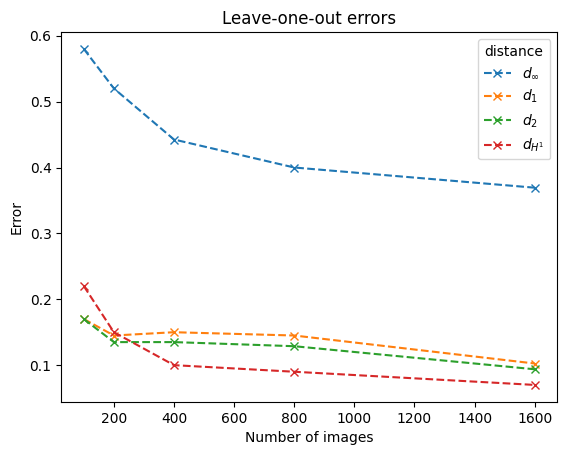

In [19]:
plt.plot(steps, loo_err_inf, 'x--')
plt.plot(steps, loo_err_one, 'x--')
plt.plot(steps, loo_err_two, 'x--')
plt.plot(steps, loo_err_H1, 'x--')
plt.legend(['$d_\\infty$', '$d_1$', '$d_2$', '$d_{H^1}$'], loc='best', title='distance')
plt.title('Leave-one-out errors')
plt.xlabel('Number of images')
plt.ylabel('Error')
plt.show()

The plot confirm the statement in the assignment: is possible to decrease the error by using a better norm. 


## Assigment 7

Use the `BallTree` algorithm (https://en.wikipedia.org/wiki/Ball_tree), from the `sklearn` package, and construct a tree data structure **that uses a distance from the steps defined above**.

For N in `[3200, 6400]` and for each distance defined above

- Build a tree using the first N entries of the training set `x_train`
- Construct a function that tests the efficiency on all the entries of the test set `x_test`:
    - for any image in `x_test`, call it `x_test[i]`, query the tree for the nearest neighbor (call it `k`), and assign as predicted digit the digit of the `x_train[k]` image, i.e., `y_train[k]`
    - check if `y_train[k]` is equal to the corresponding entry in `y_test[i]`. If not, increment a counter of the error
    - return the efficiency, i.e., `error_counter/len(x_test)`
- Plot, in a single graph, the error of each distance as a function of `N` (including labels, titles, etc.)

- Once you have the tree, experiment with different nearest neighbor algorithms, i.e., instead of taking only one nearest neighbor, take a larger number (a small number of your choice), and instead of returning the single closest digit, return the one with the largest number of occurrences. Plot the same graph you gave before, and see if you gain an improvement. Motivate all choices you have to make to get to the final answer.


**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

*Answer*:

Let's begin by defining the function that computes the efficiency of the algorithm: 

In [20]:
# Due to my computer's limitations, I've applied the classification only to the first 2750 images
# to make the computation doable in a reasonable time.
def class_err(tree, k=1, n=2750, xtest=x_test):
    '''
    Computes the classification error for the first n images in the dataset, considering in
    the classification only the k nearest neighbors.
    Args:
        tree: sklearn.neighbors.BallTree, the tree used to compute the nearest neighbors
        k: int, the number of nearest neighbors to consider
        n: int, the number of images to consider
        xtest: np.array of shape (m, n, n), which represents m images of shape (n, n). 
                Default: x_test
    Returns:
        float: the classification error
    '''

    y_predict=tree.query(xtest[:n].reshape(len(xtest[:n]), len(xtest[0])**2), k=k, return_distance=False)
    counter=0
    y_lab=np.array([0 for i in range(k)])
    for i in range(len(xtest[:n])):
        for j in range(k):
            y_lab[j] = y_train[y_predict[i][j]]
        lab = np.bincount(y_lab).argmax()
        if lab != y_test[i]:
            counter += 1
    return counter/len(xtest[:n])

In [21]:
# Exercise 7 part 1: Timing

N = 100

distances = [d_infty, d_one, d_two, d_H1_fast]

for dist in distances:
    print(f'{dist.__name__} - training time:')
    %timeit BallTree(x_train[:N].reshape(N, x_train.shape[1]**2), metric=dist)
    tree = BallTree(x_train[:N].reshape(N, x_train.shape[1]**2), metric=dist)
    print(f'\n{dist.__name__} - error computation time:')
    if dist != d_H1_fast:
        %timeit class_err(tree, k=1, xtest=x_test[:N])
    else:
        %timeit class_err(tree, k=1, xtest=x_test_norm[:N])
    print('------------------------------')

d_infty - training time:
1.23 ms ± 5.96 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

d_infty - error computation time:
40.2 ms ± 210 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
------------------------------
d_one - training time:
1.22 ms ± 1.89 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

d_one - error computation time:
40.2 ms ± 326 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
------------------------------
d_two - training time:
1.35 ms ± 15.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

d_two - error computation time:
47 ms ± 273 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
------------------------------
d_H1_fast - training time:
3.46 ms ± 28.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

d_H1_fast - error computation time:
156 ms ± 633 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
------------------------------


- Evaluate the model for N in `[3200, 6400]` and for each distance defined above: 

In [22]:
N = [3200, 6400]
distances = [d_infty, d_one, d_two]
class_errs = np.zeros((len(N), len(distances)+1))
for n in N:
    for d in distances:
        tree = BallTree(x_train[:n].reshape(n, x_train.shape[1]**2), metric=d)
        ce = class_err(tree, xtest=x_test[:n])
        class_errs[N.index(n), distances.index(d)] = ce
    # d_H1 using the normalized images set
    tree = BallTree(x_train_norm[:n].reshape(n, x_train_norm.shape[1]**2), metric=d)
    ce = class_err(tree, xtest=x_test_norm[:n])
    class_errs[N.index(n), 3] = ce
    
np.stack((class_errs[0], class_errs[1]), axis=0)

array([[0.40545455, 0.124     , 0.11018182, 0.10327273],
       [0.34618182, 0.10763636, 0.09163636, 0.08472727]])

- Now let's check if and how the number of neighbors $k$ affects the efficiency of the algorithm:

In [23]:
steps = [100 * 2**i for i in range(8)]  
distances = [d_infty, d_one, d_two, d_H1_fast]
K = [1 + 3*i for i in range(6)]
# Save the result in a 3d-array :  (k, distance, N)
errors = np.zeros((len(K), len(distances), len(steps)))
times = np.zeros((len(K), len(distances), len(steps)))

PRECOMPUTED = True

if PRECOMPUTED:
    errors = np.load("errors.npy")
    times = np.load("times.npy")
else:
    for k in K:
        for d in distances:
            for i, n in enumerate(steps):
                ts = time.time()
                if d != d_H1_fast:
                    tree = BallTree(x_train[:n].reshape(n, x_train.shape[1]**2), metric=d)
                    errors[K.index(k), distances.index(d), i] = class_err(tree, k=k, xtest=x_test[:n])
                else:
                    tree = BallTree(x_train_norm[:n].reshape(n, x_train_norm.shape[1]**2), metric=d)
                    errors[K.index(k), distances.index(d), i] = class_err(tree, k=k, xtest=x_test_norm[:n])
                te = time.time()
                times[K.index(k), distances.index(d), i] = te-ts
    # save the results: 
    np.save("errors.npy", errors)
    np.save("times.npy", times)

In [24]:
print('Elapsed time (in minutes):', np.sum(times)/60)

Elapsed time (in minutes): 197.2124181866646


In [25]:
# better display the results
pdinfty = pd.DataFrame(errors[:, distances.index(d_infty), :], index=K, columns=steps)
pdone = pd.DataFrame(errors[:, distances.index(d_one), :], index=K, columns=steps)
pdtwo = pd.DataFrame(errors[:, distances.index(d_two), :], index=K, columns=steps)
pdH1 = pd.DataFrame(errors[:, distances.index(d_H1_fast), :], index=K, columns=steps)

tables = [pdinfty, pdone, pdtwo, pdH1]
for t in tables:
    t.index.name = 'k'
    t.columns.name = 'N'

pdinfty['distance'] = 'infty'
pdone['distance'] = 'one'
pdtwo['distance'] = 'two'
pdH1['distance'] = 'H1'

global_table = pd.concat([pdinfty, pdone, pdtwo, pdH1])
global_table.sort_index(inplace=False)

N,100,200,400,800,1600,3200,6400,12800,distance
k,,,,,,,,,
1,0.71,0.625,0.5625,0.55125,0.473750,0.405455,0.346182,0.294182,infty
1,0.35,0.315,0.2375,0.19125,0.159375,0.124000,0.107636,0.086182,one
1,0.33,0.315,0.2275,0.18250,0.145625,0.110182,0.091636,0.072000,two
1,0.28,0.265,0.2175,0.17625,0.156250,0.109818,0.086909,0.066545,H1
4,0.33,0.325,0.2475,0.19500,0.155625,0.118182,0.094909,0.073455,two
4,0.70,0.630,0.5700,0.55000,0.494375,0.423636,0.359273,0.308727,infty
4,0.41,0.375,0.2575,0.19375,0.152500,0.109818,0.089455,0.066182,H1
4,0.35,0.330,0.2425,0.22250,0.181250,0.137091,0.106545,0.085091,one
7,0.32,0.340,0.2775,0.21125,0.157500,0.118182,0.097091,0.073455,two


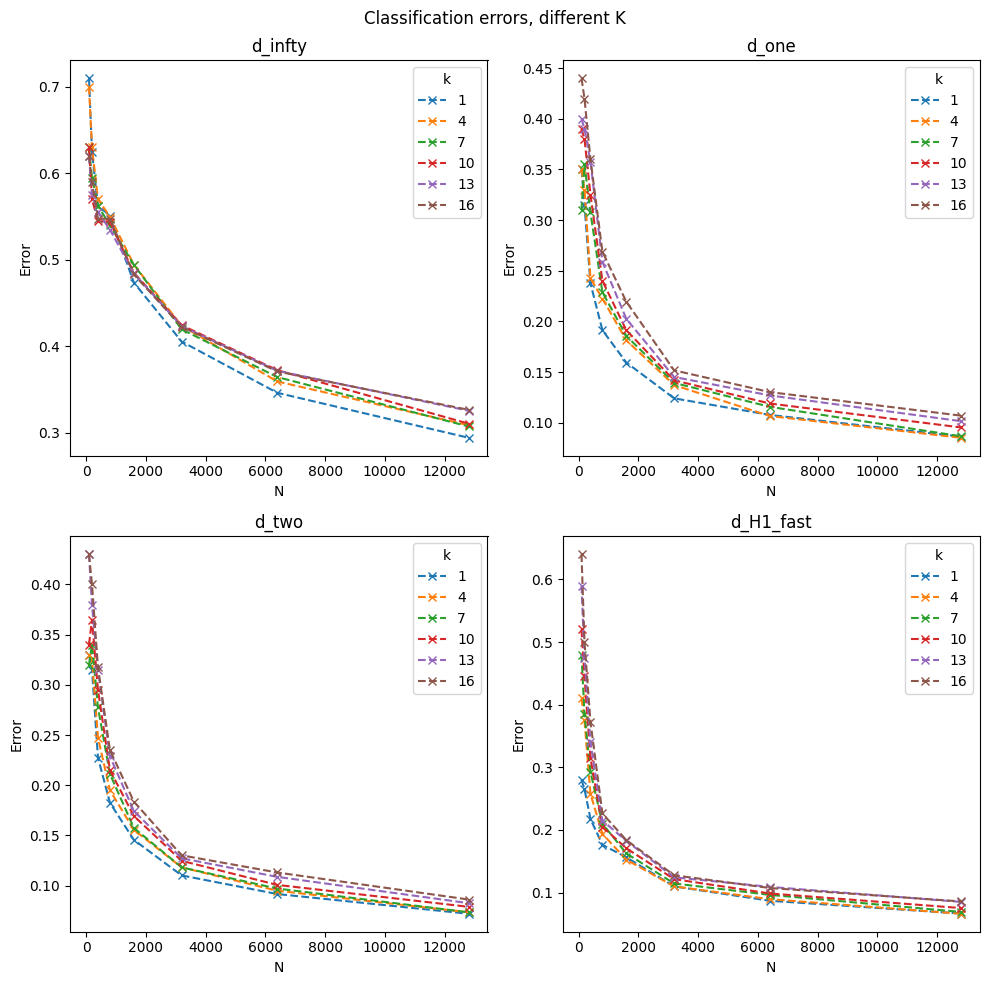

In [26]:
distances = [d_infty, d_one, d_two, d_H1_fast]

fig, axes = plt.subplots(2,2, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        distance = distances[2*i+j]
        data = errors[:, distances.index(distance), :].T
        for k in K:
            axes[i,j].plot(steps, data[:, K.index(k)], 'x--')
        axes[i,j].legend(K, loc='best', title='k')
        axes[i,j].set_title(f'{distance.__name__}')
        axes[i,j].set_xlabel('N')
        axes[i,j].set_ylabel('Error')
fig.suptitle('Classification errors, different K')
plt.tight_layout()
plt.show()

Considering a different number of neighbors $k$ seems to affect the efficiency of the algorithm when it uses any distance, but not in a predictable way i.e. augmenting $k$ doesn't improve always the efficiency.

From the plot above, we can see that the best results are obtained for $k=4$ for all the distances but $d_{\infty}$, for which the best result is obtained for $k=1$. 
It is relevant to remark in the first plot that even if the lowest error is obtained for $k=1$, the evinced general trend in all the other situations is that at the beginning, for a smaller values of $N$, choosing $k=1$ leads to lower error, but the curve of the error for $k=4$ decreases faster, and for a larger value of $N$ the error for $k=4$ is lower than the error for $k=1$. It's reasonable to think that $k=4$ is a better choice than $k=1$ for the algorithm, and eventually, for a larger value of $N$, will perform better than even in the $d_{\infty}$ case.

For the following comparison, I will use the $k$ which gives the best results for each distance for the sake of simplicity, i.e. $k=4$ for all the distances but $d_{\infty}$, for which $k=1$.

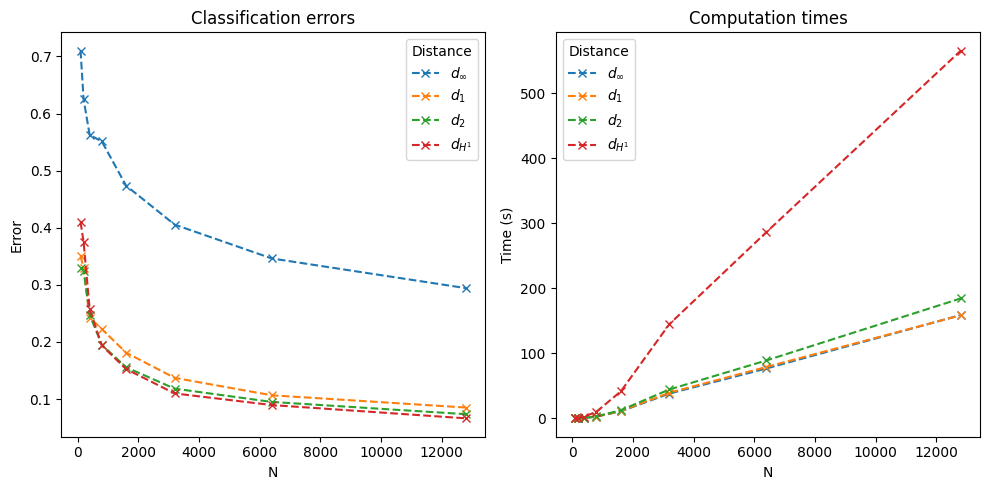

In [27]:
# extract the desidered errors
inf = global_table.query('distance == "infty" & k == 1').drop('distance', axis=1).values
l1 = global_table.query('distance == "one" & k == 4').drop('distance', axis=1).values
l2 = global_table.query('distance == "two" & k == 4').drop('distance', axis=1).values
h1 = global_table.query('distance == "H1" & k == 4').drop('distance', axis=1).values
# extract the desidered times
inf_time = times[0, distances.index(d_infty), :]
l1_time = times[1, distances.index(d_one), :]
l2_time = times[1, distances.index(d_two), :]
h1_time = times[1, distances.index(d_H1_fast), :]


fig, axes = plt.subplots(1,2, figsize=(10, 5))

axes[0].plot(steps, inf.reshape(-1), 'x--')
axes[0].plot(steps, l1.reshape(-1), 'x--')
axes[0].plot(steps, l2.reshape(-1), 'x--')
axes[0].plot(steps, h1.reshape(-1), 'x--')
axes[0].legend(['$d_\\infty$', '$d_1$', '$d_2$', '$d_{H^1}$'], loc='best', title='Distance')
axes[0].set_title('Classification errors')
axes[0].set_xlabel('N')
axes[0].set_ylabel('Error')

axes[1].plot(steps, inf_time.reshape(-1), 'x--')
axes[1].plot(steps, l1_time.reshape(-1), 'x--')
axes[1].plot(steps, l2_time.reshape(-1), 'x--')
axes[1].plot(steps, h1_time.reshape(-1), 'x--')
axes[1].legend(['$d_\\infty$', '$d_1$', '$d_2$', '$d_{H^1}$'], loc='best', title='Distance')
axes[1].set_title('Computation times')
axes[1].set_xlabel('N')
axes[1].set_ylabel('Time (s)')

plt.tight_layout()
plt.show()

*Final thoughts*:

As expected, all the distances lead to a situation in which the efficiency of the algorithm increases as the number of training samples increases. In all the tested cases, the $d_{\infty}$ distance is the worst one (i.e. it leads to the highest error rate), while the remaining distances lead to similar results.\
The number of neighbors considered $k$  act as an hyperparameter of the model, and it should be tuned in order to obtain the best results.

All the distances considered in this project leads to algorithms that according to the previous plot seems to scale linearly with the number of training samples, i.e. $\mathcal{O}(N)$, but the $d_{H^1}$ distance is the one that requires the most time by far.  Probably using the $d_{2}$ distance is an acceptable compromise between efficiency in the classification task and computational time required.